In [10]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib nbagg
#%matplotlib inline

In [11]:
#loading data 
data_file1 = pd.read_csv('datafile1.csv', header=None, sep=",")
data_file2 = pd.read_csv('datafile2.csv', header=None, sep=",")
data_file3 = pd.read_csv('datafile3.csv', header=None, sep=",")
data_file4 = pd.read_csv('datafile4.csv', header=None, sep=",")
data_file1.columns = ['x1', 'x2','y']
data_file2.columns = ['x1', 'x2','y']
data_file3.columns = ['x1', 'x2','y']
data_file4.columns = ['x1', 'x2','y']

data_file1


,x1,x2,y
0,0.474341,-1.164631,0
1,1.683638,-1.782302,0
2,1.589368,0.049690,1
3,-1.026358,-0.320719,0
4,0.860988,-0.168258,0
5,1.995155,1.665182,1
6,0.579903,0.528699,1
7,-0.267814,1.382274,1
8,0.198726,-0.972309,0
9,1.620383,-0.690113,0


<IPython.core.display.Javascript object>


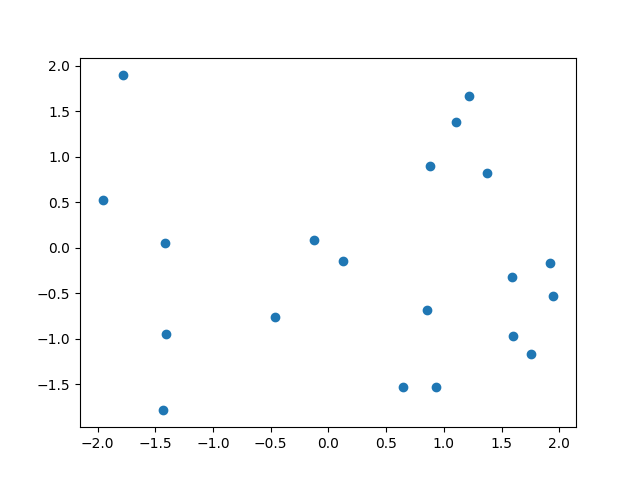

In [12]:
#scatter plot of data_file1
plt.scatter(data_file4['x1'], data_file1['x2'])
plt.show()

In [13]:
# weights = [w1,w2,bias]


In [166]:
#predict function
# def predict(x1,x2,w1,w2,b):
#     #t = x1*w1 + x2*w2 + b
#     x = np.matrix([x1, x2, 1])
#     w = np.matrix([[w1], [w2], [b]])
#     activation = np.dot(x,w)
#     if(activation>0):
#         return 1
#     else:
#         return 0
def predict(x,w):
    activation = np.dot(x,w)
    if(activation>0):
        return 1
    else:
        return 0

In [175]:
#train function
# def train(x1,x2,y,w1,w2,b):
#     print("\n")
#     epochs = 20
#     n = 0.01
#     for i in range(epochs):
#         t = predict(x1,x2,w1,w2,b)
#         error = y-t
#         w1 = w1 + n*error*x1
#         w2 = w2 + n*error*x2
#         b = b + n*error
#         print('epoch = ',i,' w1 = ',w1,' w2 = ',w2,' bias = ',b,' error = ',error)
#         if(error == 0):
#             break
#     return[w1,w2,b]  

def train(x,w,y):
    #print("\n")
    epochs = 20
    n = 0.01
    for i in range(epochs):
        activation = predict(x,w)
        error = y-activation
        w[0][0] = w[0][0] + n*error*x.item((0, 0))
        w[1][0] = w[1][0] + n*error*x.item((0, 1))
        w[2][0] = w[2][0] + n*error
#         w1 = w1 + n*error*x1
#         w2 = w2 + n*error*x2
#         b = b + n*error
        #print('epoch = ',i,' w1 = ', w[0][0],' w2 = ', w[1][0],' bias = ', w[2][0],' error = ',error)
        if(error == 0):
            break
    return[ w[0][0], w[1][0], w[2][0]]  
        
        
        


In [176]:
#function for normal plotting
# def plotting(W1,W2,bias):
#     w1 = W1[-1]
#     w2 = W2[-1]
#     b = bias[-1]
#     x1 = np.arange(-4,4)
#     x2 = []
#     c = (-b)/w2
#     m = (-w1)/w2
#     for x in x1:
#         x2.append(m*x+c)
#     plt.plot(x1,x2)
#     plt.scatter(data_file1['x1'], data_file1['x2'])
#     plt.show()

In [177]:
def perceptron(data_file):
    x1 = data_file['x1'].tolist()
    x2 = data_file['x2'].tolist()
    y = data_file['y'].tolist()
    W1 = []
    W2 = []
    bias = []
    weights = np.random.random_sample([3])
    
    w1 = weights[0]
    w2 = weights[1]
    b = weights[2]
    
    for i in range(len(x1)):
        #p = train(x1[i],x2[i],y[i],w1,w2,b)
        x = np.matrix([x1[i], x2[i],1])
        w = np.matrix([[w1], [w2], [b]])
        p = train(x,w,y[i])
        W1.append(p[0].item(0,0))
        W2.append(p[1].item(0,0))
        bias.append(p[2].item(0,0))
        w1 = W1[-1]
        w2 = W2[-1]
        b = bias[-1]
    w_matrix = np.column_stack((W1, W2, bias))
    #plotting(W1,W2,bias) 
    return w_matrix

In [182]:
w_matrix1 = perceptron(data_file1)
w_matrix1

array([[ 0.54516731,  1.0217255 ,  0.91939724],
       [ 0.52833093,  1.03954853,  0.90939724],
       [ 0.52833093,  1.03954853,  0.90939724],
       [ 0.5488581 ,  1.04596291,  0.88939724],
       [ 0.37666053,  1.07961455,  0.68939724],
       [ 0.37666053,  1.07961455,  0.68939724],
       [ 0.37666053,  1.07961455,  0.68939724],
       [ 0.37666053,  1.07961455,  0.68939724],
       [ 0.37666053,  1.07961455,  0.68939724],
       [ 0.14980696,  1.17623032,  0.54939724],
       [ 0.14980696,  1.17623032,  0.54939724],
       [ 0.24666557,  1.18783302,  0.46939724],
       [ 0.09997451,  1.1706643 ,  0.26939724],
       [ 0.09997451,  1.1706643 ,  0.26939724],
       [ 0.09997451,  1.1706643 ,  0.26939724],
       [ 0.09997451,  1.1706643 ,  0.26939724],
       [ 0.09997451,  1.1706643 ,  0.26939724],
       [ 0.09997451,  1.1706643 ,  0.26939724],
       [ 0.09997451,  1.1706643 ,  0.26939724],
       [ 0.09997451,  1.1706643 ,  0.26939724]])

In [127]:
#w_matrix2 = perceptron(data_file2)

In [128]:
#w_matrix3 = perceptron(data_file3)

In [129]:
#w_matrix4 = perceptron(data_file4)

<IPython.core.display.Javascript object>


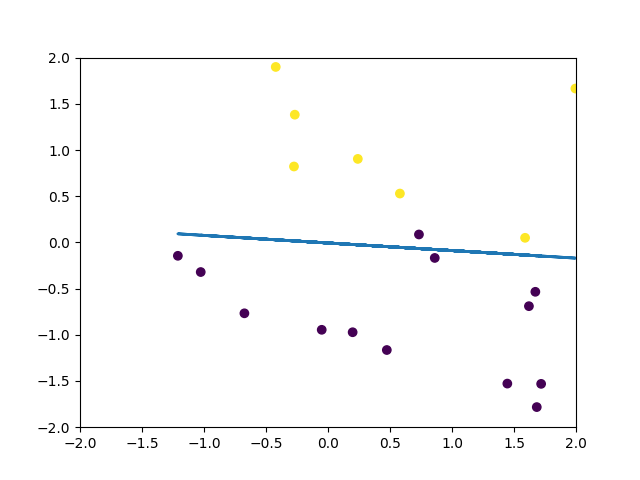

In [82]:
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

ax.scatter(data_file1['x1'], data_file1['x2'], c = data_file1['y'])
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = data_file1['x1']
    y = -(w_matrix[i][2]/w_matrix[i][1]) -((w_matrix[i][1]*x)/w_matrix[i][2])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(w_matrix), interval=20, blit=True)
plt.show()


<IPython.core.display.Javascript object>


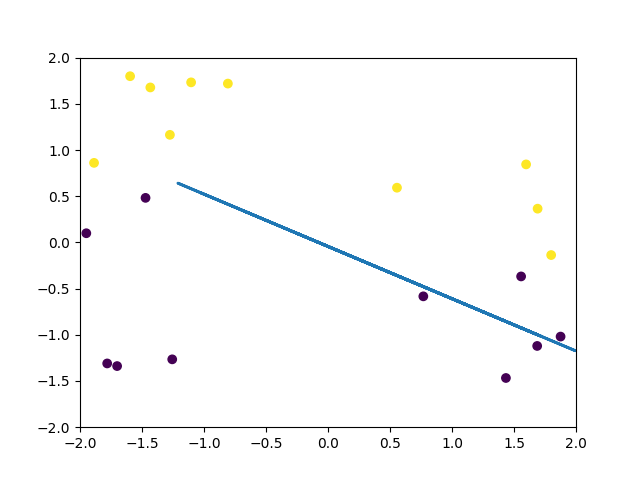

In [181]:
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

ax.scatter(data_file2['x1'], data_file2['x2'], c = data_file2['y'])
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = data_file1['x1']
    y = -(w_matrix1[i][2]/w_matrix2[i][1]) -((w_matrix[i][0]*x)/w_matrix1[i][1])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(w_matrix1), interval=20, blit=True,repeat = False)
plt.show()


<IPython.core.display.Javascript object>


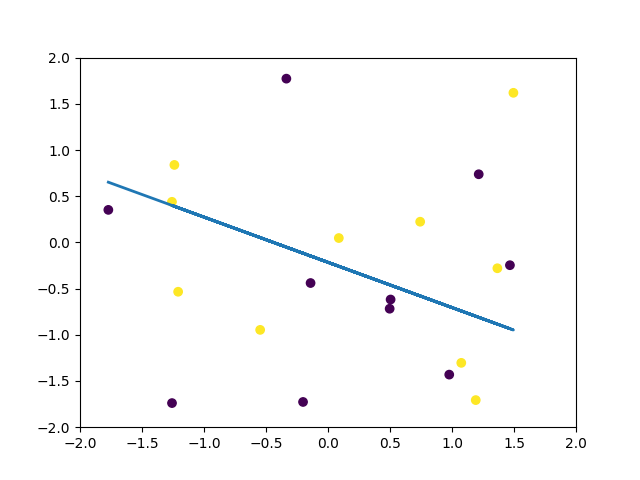

In [73]:
# #animated plot for data_file3
# fig = plt.figure()
# ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
# line, = ax.plot([], [], lw=2)

# ax.scatter(data_file3['x1'], data_file3['x2'], c = data_file3['y'])
# # initialization function: plot the background of each frame
# def init():
#     line.set_data([], [])
#     return line,

# def animate(i):
#     x = data_file3['x1']
#     y = -(w_matrix3[i][2]/w_matrix3[i][1]) -((w_matrix3[i][0]*x)/w_matrix3[i][1])
#     line.set_data(x, y)
#     return line,

# # call the animator.  blit=True means only re-draw the parts that have changed.
# ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(w_matrix3), interval=20, blit=True,repeat = False)
# plt.show()


In [131]:
# #animated plot for data_file4
# fig = plt.figure()
# ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
# line, = ax.plot([], [], lw=2)

# ax.scatter(data_file4['x1'], data_file4['x2'], c = data_file4['y'])
# # initialization function: plot the background of each frame
# def init():
#     line.set_data([], [])
#     return line,

# def animate(i):
#     x = data_file4['x1']
#     y = -(w_matrix4[i][2]/w_matrix4[i][1]) -((w_matrix4[i][0]*x)/w_matrix4[i][1])
#     line.set_data(x, y)
#     return line,

# # call the animator.  blit=True means only re-draw the parts that have changed.
# ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(w_matrix4), interval=20, blit=True,repeat = False)
# plt.show()


In [88]:
w = np.matrix([[1], [2], [3]])

In [111]:
w[0][0]= 0
w

matrix([[0],
        [2],
        [1]])

In [100]:
x = np.matrix([1, 2, 3])

In [110]:
x.item((0, 0))

1

In [147]:
[matrix([[ 0.60362443]]), matrix([[ 0.96713645]]), matrix([[ 0.29444309]])]

NameError: name 'matrix' is not defined